# ROLLING CORRELATION 

## TECHNOLOGY

### NO SHIFT

     Sentiment   Returns  Rolling Correlation
0     0.491525  0.010216                  NaN
1     0.491803 -0.007294                  NaN
2     0.346939 -0.033189                  NaN
3     0.344262 -0.002346                  NaN
4     0.375000 -0.003568                  NaN
5     0.357143 -0.003568                  NaN
6     0.315789 -0.003568             0.389344
7     0.375000 -0.001387             0.072147
8     0.458333  0.010880             0.529831
9     0.333333  0.005625             0.656926
10    0.543478 -0.022267            -0.497290
11    0.340000  0.008953            -0.550723
12    0.326087  0.008953            -0.619665
13    0.343750  0.008953            -0.755021
14    0.400000  0.008953            -0.758319
15    0.434783 -0.023153            -0.849522
16    0.385714 -0.007905            -0.826691
17    0.260870 -0.009220            -0.297214
18    0.425532 -0.024101            -0.436576
19    0.297297 -0.024101            -0.102382
20    0.230769 -0.024101          

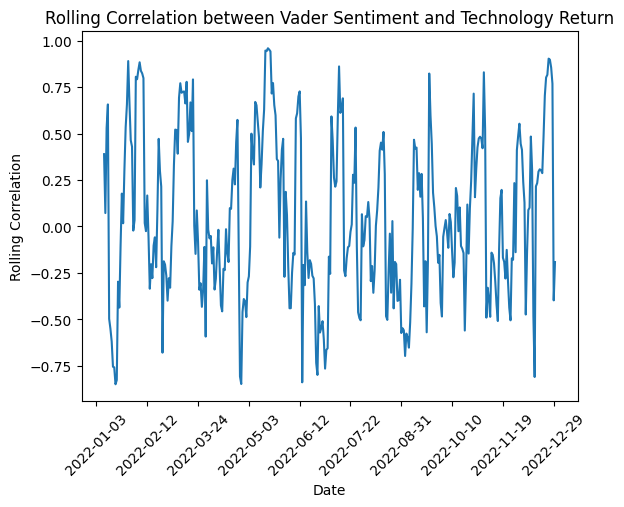

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv')
df_returns = pd.read_csv('Portfolio_Returns_Long.csv')

# Gewünschte Spalten auswählen
sentiment_column = 'VADER Sentiment'
returns_column = 'Technology Return'

# Rolling Correlation berechnen
rolling_correlation = df_sentiment[sentiment_column].rolling(window=7).corr(df_returns[returns_column])

# Daten und Rolling Correlation anzeigen
data = pd.concat([df_sentiment[sentiment_column], df_returns[returns_column], rolling_correlation], axis=1)
data.columns = ['Sentiment', 'Returns', 'Rolling Correlation']
pd.set_option('display.max_rows', None)  # Zeigt alle Zeilen im DataFrame an
print(data)

# Plot erstellen
plt.plot(df_returns['Date'], rolling_correlation)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.title('Rolling Correlation between Vader Sentiment and Technology Return')
plt.xticks(rotation=45)

# Anpassen der Datumsbeschriftungen auf der X-Achse
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Ändern Sie die 6 entsprechend Ihren Anforderungen

plt.show()


### SHIFT

### DAILY ANALYSIS 1-Day Window and 1-3 Day-Lag

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten einlesen
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv')
df_returns = pd.read_csv('Portfolio_Returns_Long.csv')

# Gewünschte Spalten auswählen
sentiment_column = 'VADER Sentiment'
returns_column = 'Technology Return'

# Überprüfung der Datenqualität
print("Datenqualität - Sentiment:")
print(df_sentiment.info())
print("\nDatenqualität - Renditen:")
print(df_returns.info())

# Überprüfung auf fehlende oder ungültige Werte
print("\nFehlende Werte - Sentiment:")
print(df_sentiment.isnull().sum())
print("\nFehlende Werte - Renditen:")
print(df_returns.isnull().sum())

# Überprüfung der Datentypen
print("\nDatentypen - Sentiment:")
print(df_sentiment.dtypes)
print("\nDatentypen - Renditen:")
print(df_returns.dtypes)

# Überprüfung auf eindeutige Werte
print("\nEindeutige Werte - Sentiment:")
print(df_sentiment[sentiment_column].unique())
print("\nEindeutige Werte - Renditen:")
print(df_returns[returns_column].unique())

# Überprüfung auf ungültige Werte in den Spalten
invalid_sentiment = df_sentiment[sentiment_column].isnull().sum()
invalid_returns = df_returns[returns_column].isnull().sum()

if invalid_sentiment > 0:
    print("Ungültige Werte im Sentiment-Datensatz gefunden.")
if invalid_returns > 0:
    print("Ungültige Werte im Rendite-Datensatz gefunden.")

# Überprüfung auf ungültige Werte in den Indizes
invalid_sentiment_indices = df_sentiment.index[df_sentiment[sentiment_column].isnull()]
invalid_returns_indices = df_returns.index[df_returns[returns_column].isnull()]

if len(invalid_sentiment_indices) > 0:
    print("Ungültige Werte an den folgenden Indizes im Sentiment-Datensatz gefunden:")
    print(invalid_sentiment_indices)
if len(invalid_returns_indices) > 0:
    print("Ungültige Werte an den folgenden Indizes im Rendite-Datensatz gefunden:")
    print(invalid_returns_indices)

# Daten für die Grafik erstellen
correlation_values = []
dates = []

# Überprüfung der Daten für die Grafik
valid_correlation_values = 0

# Korrelationsberechnung für jeden Tag
for i in range(len(df_sentiment) - 1):
    sentiment = df_sentiment.loc[i, sentiment_column]
    returns = df_returns.loc[i + 1, returns_column]
    if pd.notnull(sentiment) and pd.notnull(returns):
        correlation = np.corrcoef([sentiment], [returns])[0, 1]  # Arrays erstellen
        if np.isnan(correlation):
            print(f"NaN-Korrelation an Index {i}")
            print("Sentiment:", sentiment)
            print("Returns:", returns)
        else:
            correlation_values.append(correlation)
            dates.append(df_sentiment.loc[i, 'Datum'])
            valid_correlation_values += 1

# Überprüfung der Daten für die Grafik
if valid_correlation_values == 0:
    print("Keine gültigen Korrelationswerte gefunden.")
if len(dates) == 0:
    print("Keine gültigen Datumswerte gefunden.")

# Grafik erstellen, nur wenn gültige Korrelationswerte vorhanden sind
if valid_correlation_values > 0:
    plt.plot(dates, correlation_values)
    plt.xlabel('Datum')
    plt.ylabel('Korrelation')
    plt.title('Korrelation zwischen Sentiment und Rendite')
    plt.xticks(rotation=45)
    plt.show()


Datenqualität - Sentiment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Datum              362 non-null    object 
 1   VADER Sentiment    362 non-null    float64
 2   FinBERT Sentiment  362 non-null    float64
 3   GPT Sentiment      362 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.4+ KB
None

Datenqualität - Renditen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  362 non-null    object 
 1   Technology Return     362 non-null    float64
 2   Financials Return     362 non-null    float64
 3   Energy Return         362 non-null    float64
 4   Technology Portfolio  362 non-null    float64
 5   Financials Portfolio  362 non-

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


### WEEKLY ANALYSIS 7-Day Window and 1-3 Day-Lag

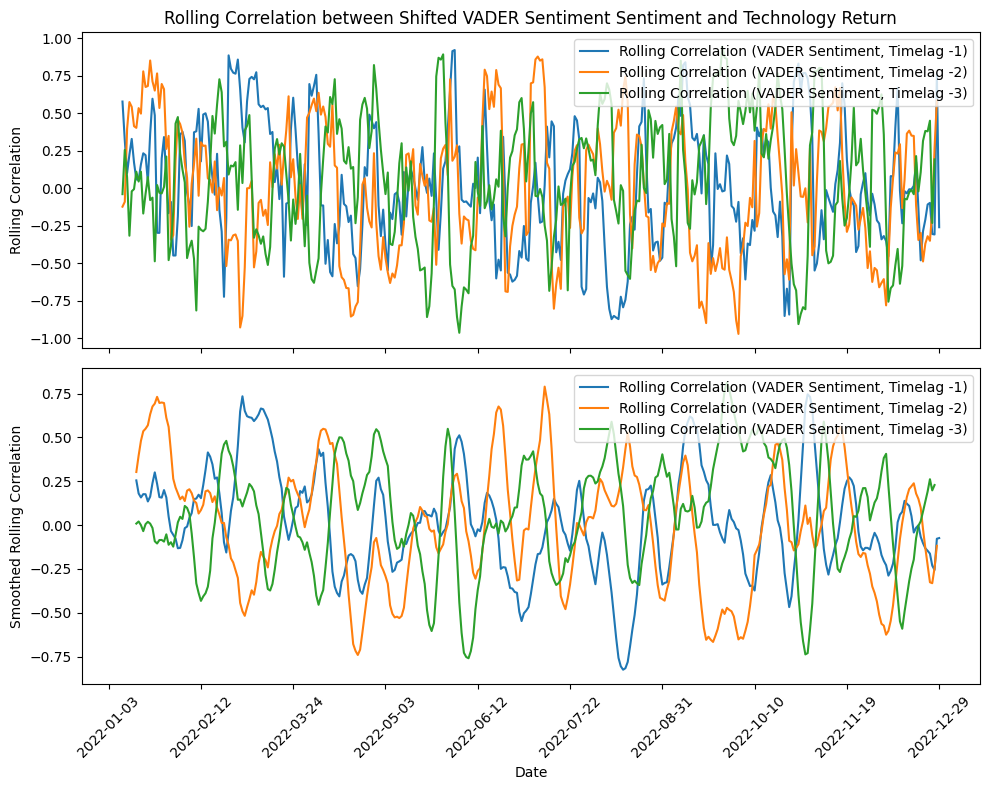

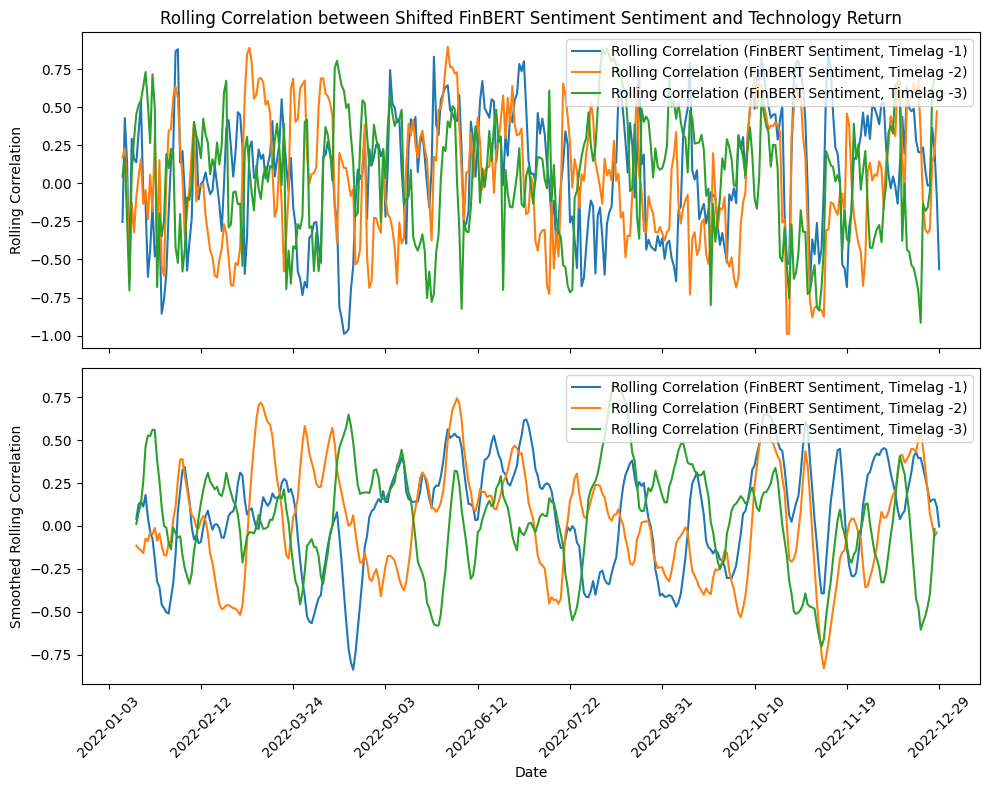

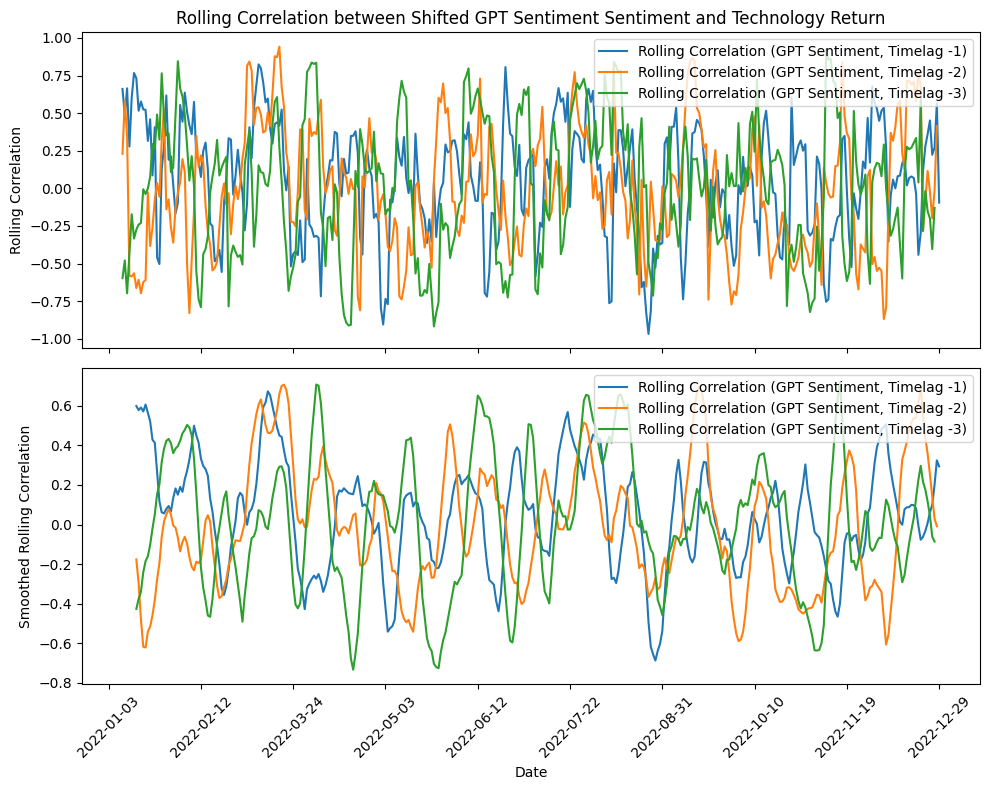

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv')
df_returns = pd.read_csv('Portfolio_Returns_Long.csv')

# Gewünschte Spalten auswählen
sentiment_columns = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns_column = 'Technology Return'

# Daten und Rolling Correlation für verschiedene Timelags berechnen
timelags = range(-1, -4, -1)
correlation_data = pd.DataFrame()
for sentiment_column in sentiment_columns:
    for timelag in timelags:
        shifted_sentiment = df_sentiment[sentiment_column].shift(timelag)
        rolling_correlation = shifted_sentiment.rolling(window=7).corr(df_returns[returns_column])
        
        # Daten und Rolling Correlation zum DataFrame hinzufügen
        correlation_data[f'Rolling Correlation ({sentiment_column}, Timelag {timelag})'] = rolling_correlation

# Speichern der Ergebnisse in eine CSV-Datei
correlation_data.to_csv('Rolling_Correlation_Results.csv', index=False)

# Plot erstellen
for sentiment_column in sentiment_columns:
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot der Originaldaten
    for column in correlation_data.columns:
        if sentiment_column in column:
            axs[0].plot(df_returns['Date'], correlation_data[column], label=column)

    axs[0].set_ylabel('Rolling Correlation')
    axs[0].set_title(f'Rolling Correlation between Shifted {sentiment_column} Sentiment and Technology Return')
    axs[0].legend(loc='upper right')

    # Plot der geglätteten Daten
    smoothed_data = correlation_data.filter(like=sentiment_column).rolling(window=7).mean()
    for column in smoothed_data.columns:
        axs[1].plot(df_returns['Date'], smoothed_data[column], label=column)

    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Smoothed Rolling Correlation')
    axs[1].legend(loc='upper right')

    # Anpassen der Datumsbeschriftungen auf der X-Achse
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

    plt.tight_layout()
    plt.show()


### MONTHLY ANALYSIS 30-Day Window and 1-3 Day Lag

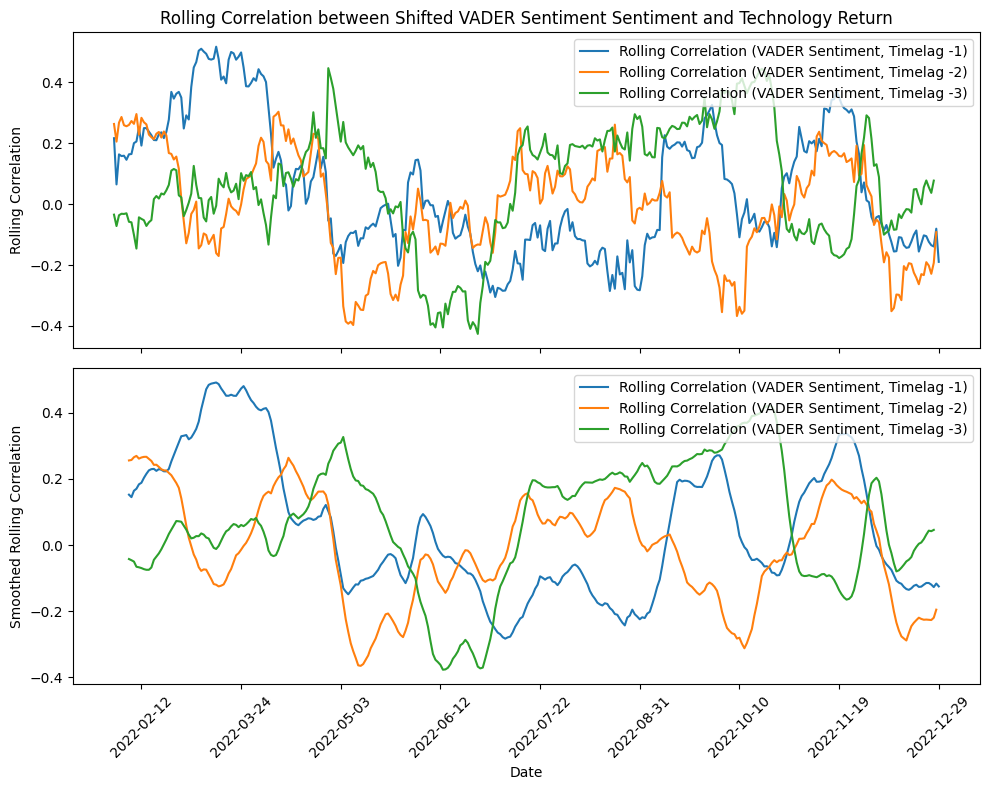

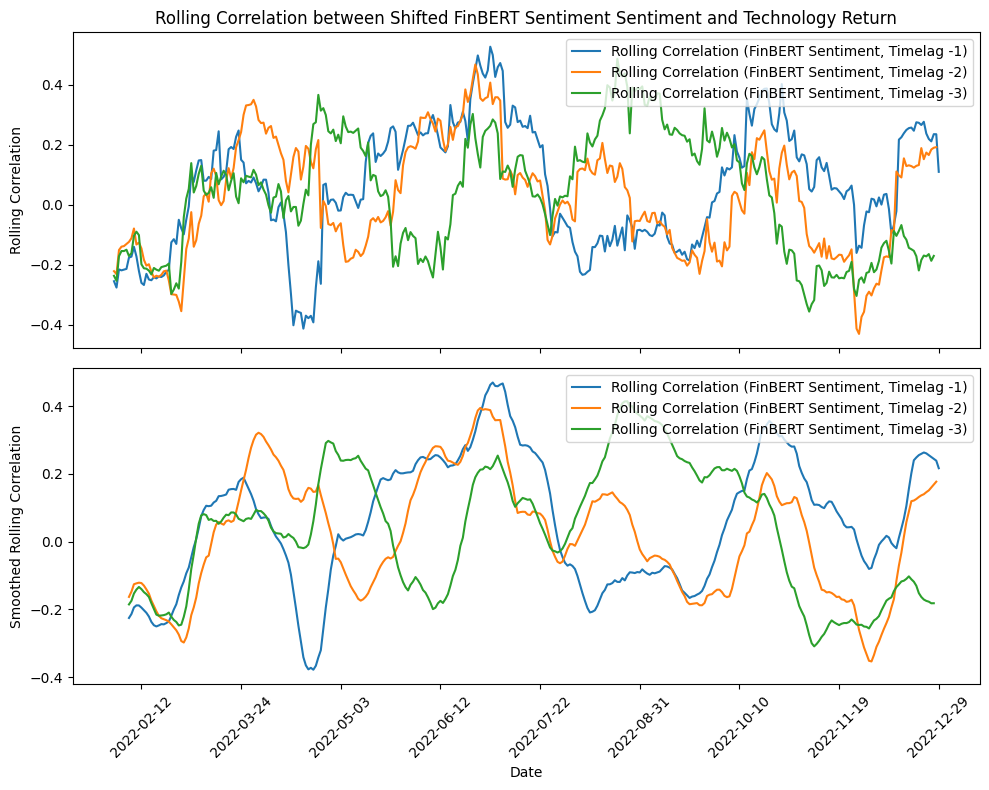

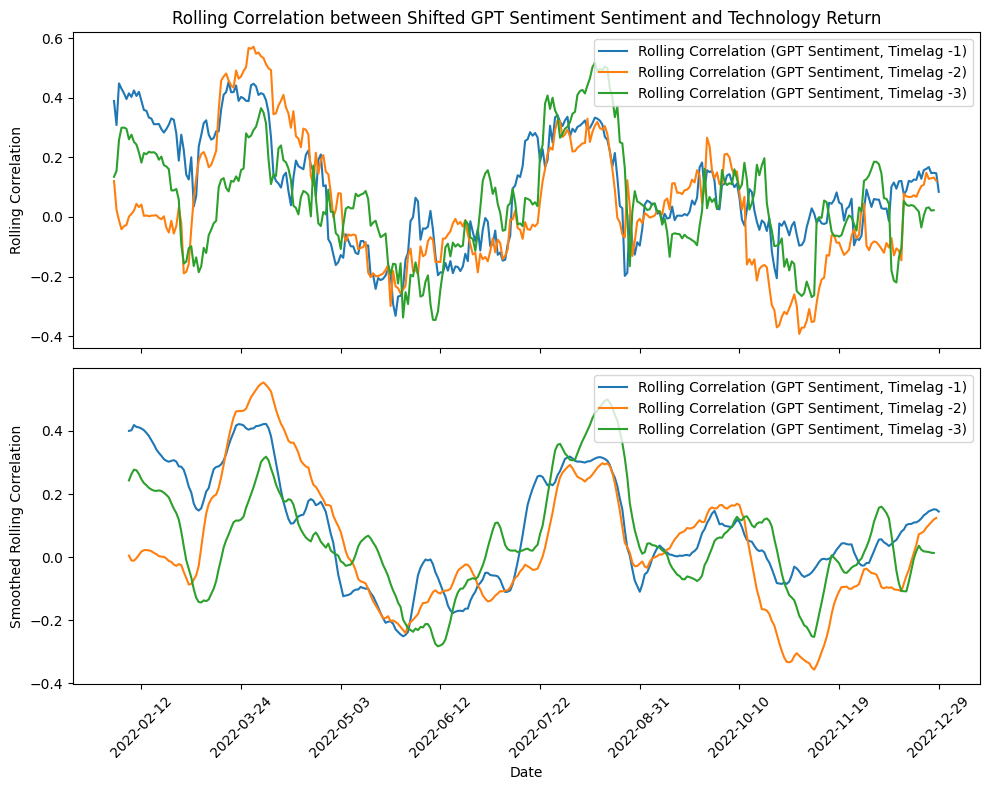

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv')
df_returns = pd.read_csv('Portfolio_Returns_Long.csv')

# Gewünschte Spalten auswählen
sentiment_columns = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns_column = 'Technology Return'

# Daten und Rolling Correlation für verschiedene Timelags berechnen
timelags = range(-1, -4, -1)
correlation_data = pd.DataFrame()
for sentiment_column in sentiment_columns:
    for timelag in timelags:
        shifted_sentiment = df_sentiment[sentiment_column].shift(timelag)
        rolling_correlation = shifted_sentiment.rolling(window=30).corr(df_returns[returns_column])
        
        # Daten und Rolling Correlation zum DataFrame hinzufügen
        correlation_data[f'Rolling Correlation ({sentiment_column}, Timelag {timelag})'] = rolling_correlation

# Speichern der Ergebnisse in eine CSV-Datei
correlation_data.to_csv('Rolling_Correlation_Results.csv', index=False)

# Plot erstellen
for sentiment_column in sentiment_columns:
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot der Originaldaten
    for column in correlation_data.columns:
        if sentiment_column in column:
            axs[0].plot(df_returns['Date'], correlation_data[column], label=column)

    axs[0].set_ylabel('Rolling Correlation')
    axs[0].set_title(f'Rolling Correlation between Shifted {sentiment_column} Sentiment and Technology Return')
    axs[0].legend(loc='upper right')

    # Plot der geglätteten Daten
    smoothed_data = correlation_data.filter(like=sentiment_column).rolling(window=7).mean()
    for column in smoothed_data.columns:
        axs[1].plot(df_returns['Date'], smoothed_data[column], label=column)

    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Smoothed Rolling Correlation')
    axs[1].legend(loc='upper right')

    # Anpassen der Datumsbeschriftungen auf der X-Achse
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

    plt.tight_layout()
    plt.show()
